In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import os 



import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#this is for the analysis on training data distribution 
data = pd.read_feather("/scaled-facets-continuous-rollout-v4.feather") 




In [ ]:
#this is for the analysis on demographic background of raters 
data_multi = pd.read_feather('scaled-facets-multi-50k-v4 (1).feather')

#GET THE FILE PATH FROM THE DATA NAME, ADD A "/"

#os.getcwd() #do this whenever the data doesn't load
#os.chdir("../") this is to move up a directory

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data

,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,infitms,outfitms,identity,hypothesis,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,target_race_6,target_race_7,target_race_7_text,target_religion_1,target_religion_2,target_religion_4,target_religion_5,target_religion_8,target_religion_9,target_religion_10,target_religion_6,target_religion_6_text,target_citizen_5,target_citizen_1,target_citizen_2,...,target_disability_2,target_disability_3,target_disability_4,target_disability_5,target_disability_9,target_disability_6,target_disability_6_text,target_identity_count,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology
0,21556,twitter,1134110084978675712,Damn [SLUR] bitch get a hobby kind of fuck shi...,0.05,0.60,6,0.52,0.58,0.868539,0.192592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,116.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,1.0
1,19190,reddit,ew8eh8e,Fuck off back to your Chapo shithole,0.23,0.62,4,0.45,0.44,0.880614,0.367588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,1.0,,2.0,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,,125.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0
2,3177,reddit,eppgjvg,"No, it means you're developing a black man dic...",0.37,0.42,4,1.40,1.10,0.857048,-0.536590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,113.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,2.0
3,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.81,1.88,0.917681,-1.130178,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0
4,173,reddit,enysnba,"I would love to use a double dildo with a bud,...",-2.98,0.37,5,2.35,1.09,0.919640,0.284625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,117.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41013,22986,twitter,1134939160471580672,Millions of #Yemen-is participated in mass ral...,-4.40,0.35,4,1.30,0.43,0.934007,-0.974684,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,1.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,142.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,NaN,NaN,NaN,,4.0
41014,14

In [ ]:
data_multi.head(10)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.200000,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39773,twitter,1159364387838341120,The trans women reading this tweet right now i...,-6.52,1.00,3,0.333333,1,1.0,2790,-0.35,0.57,0.42,0.96,0.43,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,47101,youtube,UgytWyMwDquehpAEspl4AaABAg,Question: These 4 broads who criticize America...,0.36,0.31,4,0.250000,1,1.0,3379,-0.48,1.16,0.67,0.90,0.74,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43625,youtube,Ugxgvb5k_yZm2w5V-v94AaABAg,It is about time for all illegals to go back t...,0.26,0.29,4,0.250000,1,1.0,7365,0.86,1.18,0.87,0.81,0.68,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,127.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,12538,reddit,euol97y,For starters bend over the one in pink and kic...,1.54,0.51,2,0.500000,1,1.0,488,-0.54,0.95,1.00,0.76,0.63,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,112.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11001,reddit,eueodbl,Sounds like the kinda wholsesome life I'd die ...,-4.93,0.48,3,0.333333,1,2.0,527,-0.28,0.60,0.56,0.59,0.23,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Deist,1.0,NaN,NaN,NaN,NaN,,1.0,30.4170074462890625,-84.18499755859375,0.907838,-1.186106
6,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,2.0,1.0,13168,reddit,eve4bbl,Who the fuck is this insignificant simple mind...,0.17,0.30,3,0.333333,1,1

In [ ]:
#creating new data frame for identity variables
#renaming the columns to represent identity variables

# "target_identities_1\",  # Is the comment about race?\n",
#  "    \"target_identities_2\",  # Is the comment about religion?\n",
#   "    \"target_identities_3\",  # Is the comment about national origin?\n",
#   "    \"target_identities_4\",  # Is the comment about gender?\n",
#   "    \"target_identities_5\",  # Is the comment about sexual orientation?\n",
#   "    \"target_identities_6\",  # Is the comment about age?\n",
#   "    \"target_identities_7\",  # Is the comment about disability?\n"
#        \"target_identities_9\",  # Unsure, perhaps None of the above?\n",

#race 
#"target_race_1\",  # Black or African American\n",
#   "    \"target_race_2\",  # Hispanic or Latino\n",
#  "    \"target_race_3\",  # Asian\n",
# "    \"target_race_8\",  # Middle Eastern\n",
#    "    \"target_race_4\",  # Native American\n",
#   "    \"target_race_5\",  # Pacific Islander\n",
#  "    \"target_race_6\",  # White\n",
#   "    \"target_race_7\",  # Other race\n",
#  "    \"target_race_7_text\",  # If other, which?\n",

#target_religion_1\",  # Jews\n",
# "    \"target_religion_2\",  # Christians\n",
#    "    \"target_religion_4\",  # Buddhists\n",
#    "    \"target_religion_5\",  # Hindus\n",
#    "    \"target_religion_8\",  # Mormons\n",
#    "    \"target_religion_9\",  # Atheists\n",
#    "    \"target_religion_10\",  # Muslims\n",
#    "    \"target_religion_6\",  # Other religion\n",
#    "    \"target_religion_6_text\",  # If other, which?\n"

#  "    \"target_citizen_5\",  # Specific country\n",
#    "    \"target_citizen_1\",  # Immigrant\n",
#    "    \"target_citizen_2\",  # Migrant workers\n",
#    "    \"target_citizen_3\",  # Undocumented people\n",
#    "    \"target_citizen_4\",  # Other\n",
#    "    \"target_citizen_4_text\",  # If other, which?\n",
#

#  \"target_gender_1\",  # Men\n",
#    "    \"target_gender_3\",  # Women\n",
#    "    \"target_gender_2\",  # Non-binary\n",
#    "    \"target_gender_5\",  # Transgender women\n",
#    "    \"target_gender_6\",  # Transgender men\n",
#    "    \"target_gender_7\",  # Transgender unspecified\n",
#    "    \"target_gender_4\",  # Other\n",
#    "    \"target_gender_4_text\",  # If other, which?\n",

#  "    \"target_sexuality_1\",  # Bisexual\n",
#    "    \"target_sexuality_2\",  # Gay\n",
#    "    \"target_sexuality_6\",  # Lesbian\n",
#    "    \"target_sexuality_3\",  # Heterosexual\n",
#    "    \"target_sexuality_5\",  # Other\n",
#    "    \"target_sexuality_5_text\",  # If other, which?\n",

# "    \"target_age_1\",  # Children\n",
#    "    \"target_age_2\",  # Adolescents\n",
#    "    \"target_age_3\",  # adults\n",
#    "    \"target_age_4\",  # Middle-aged\n",
#    "    \"target_age_5\",  # Seniors\n",
#    "    \"target_age_6\",  # Other\n",
#    "    \"target_age_6_text\",  # If other, which?\n",

# "    \"target_disability_1\",  # People with physical disabilities\n",
#    "    \"target_disability_2\",  # People with cognitive disorders\n",
#    "    \"target_disability_3\",  # People with mental health problems\n",
#    "    \"target_disability_4\",  # Visually impaired people\n",
#    "    \"target_disability_5\",  # Hearing impaired people\n",
#    "    \"target_disability_9\",  # No specific disability\n",
#    "    \"target_disability_6\",  # Other\n",
#    "    \"target_disability_6_text\",  # If other, which?\n"

data_identity = data.rename(columns={'target_identities_1': 'race', 
                                 'target_identities_2': 'religion',
                                 'target_identities_3': 'national_origin',
                                 'target_identities_4': 'gender',
                                 'target_identities_5': 'sexual_orientation',
                                 'target_identities_6': 'age',
                                 'target_identities_7': 'disability',
                                 'target_identities_9': 'unsure',
                                 'target_race_1': 'black',
                                 'target_race_2': 'latinx',
                                 'target_race_3': 'asian',
                                 'target_race_8': 'middle_eastern',
                                 'target_race_4': 'native_american',
                                 'target_race_5': 'pacific_islander',
                                 'target_race_6': 'white',
                                 'target_race_7': 'other_race',
                                 'target_race_7_text': 'other_race_text',
                                 'target_religion_1': 'jews',
                                 'target_religion_2': 'christians',
                                 'target_religion_4': 'buddhists',
                                 'target_religion_5': 'hindus',
                                 'target_religion_8': 'mormons',
                                 'target_religion_9': 'atheists',
                                 'target_religion_10': 'muslims',
                                 'target_religion_6': 'other_religion',
                                 'target_religion_6_text': 'other_religion_text',
                                 'target_citizen_5': 'country',
                                 'target_citizen_1': 'immigrant',
                                 'target_citizen_2': 'migrant_worker',
                                 'target_citizen_3': 'undocumented',
                                 'target_citizen_4': 'other_nationality',
                                 'target_citizen_4_text': 'other_nationality_text',
                                 'target_gender_1': 'men',
                                 'target_gender_3': 'women',
                                 'target_gender_2': 'non-binary',
                                 'target_gender_5': 'transgender_women',
                                 'target_gender_6': 'transgender_men',
                                 'target_gender_7': 'transgender_unspecified',
                                 'target_gender_4': 'other_gender',
                                 'target_gender_4_text': 'other_gender_text',
                                 'target_sexuality_1': 'bisexual',
                                 'target_sexuality_2': 'gay',
                                 'target_sexuality_6': 'lesbian',
                                 'target_sexuality_3': 'heterosexual',
                                 'target_sexuality_5': 'other_sexuality',
                                 'target_sexuality_5_text': 'other_sexuality_text',
                                 'target_age_1': 'children',
                                 'target_age_2': 'adolescents',
                                 'target_age_3': 'adults',
                                 'target_age_4': 'middle-aged',
                                 'target_age_5': 'seniors',
                                 'target_age_6': 'other_age',
                                 'target_age_6_text': 'other_age_text',
                                 'target_disability_1': 'physical_disability',
                                 'target_disability_2': 'cognitive_disability', 
                                 'target_disability_3': 'mental_health',
                                 'target_disability_4': 'visually_impaired',
                                 'target_disability_5': 'hearing_impaired',
                                 'target_disability_9': 'not_specific',
                                 'target_disability_6': 'other_disability',
                                 'target_disability_6_text': 'other_disability_text'})
                                 #'demo_gender': 'gender', 
                                 #'demo_gender_text_4': 'gender text',
                                  #'demo_trans': 'trans',
                                  #'demo_educ': 'education', 
                                  #'demo_race_ethnicie_1': 'american indian alaska native',
                                  #'demo_race_ethnicitie_2': 'asian',
                                  #'demo_race_ethnicitie_3': 'alack',
                                  #'demo_race_ethnicitie_4': 'latino',
                                  #'demo_race_ethnicitie_5': 'native hawaiian pacific islander',
                                  #'demo_race_ethnicitie_8': 'middle eastern',
                                  #'demo_race_ethnicitie_6': 'white',
                                  #'demo_race_ethnicitie_7': 'other race',
                                  #'demo_race_ethnicitie_7_text': 'other text',
                                  #'demo_age': 'age',
                                  #'demo_income': 'income',
                                  #'demo_religion_1': 'atheist',
                                  #'demo_religion_2': 'buddhist',
                                  #'demo_religion_11': 'chrisitan', 
                                  #'demo_religion_4': 'hindu',
                                  #'demo_religion_5': 'jewish',
                                  #'demo_religion_7': 'mormon',
                                  #'demo_religion_8': 'muslim',
                                  #'demo_religion_9': 'nothing in particular',
                                  #'demo_religion_10': 'other religion',
                                  #'demo_religion_10_text': 'other religion text',
                                  #'demo_sexual_orien_1': 'straight',
                                  #'demo_sexual_orien_2': 'gay lesbian',
                                  #'demo_sexual_orien_3': 'bisexual', 
                                  #'demo_sexual_orien_4': 'other sexual orientation',
                                  #'demo_sexual_orien_5': 'prefer not to say',
                                  #'demo_sexual_orien_4_text': 'other sexual orientation text'})



In [ ]:
#data_multi = data.rename(columns={'target_identities_1': 'race', 
                                 'target_identities_2': 'religion',
                                 'target_identities_3': 'national_origin',
                                 'target_identities_4': 'gender',
                                 'target_identities_5': 'sexual_orientation',
                                 'target_identities_6': 'age',
                                 'target_identities_7': 'disability',
                                 'target_identities_9': 'unsure',
                                 'target_race_1': 'black',
                                 'target_race_2': 'latinx',
                                 'target_race_3': 'asian',
                                 'target_race_8': 'middle_eastern',
                                 'target_race_4': 'native_american',
                                 'target_race_5': 'pacific_islander',
                                 'target_race_6': 'white',
                                 'target_race_7': 'other_race',
                                 'target_race_7_text': 'other_race_text',
                                 'target_religion_1': 'jews',
                                 'target_religion_2': 'christians',
                                 'target_religion_4': 'buddhists',
                                 'target_religion_5': 'hindus',
                                 'target_religion_8': 'mormons',
                                 'target_religion_9': 'atheists',
                                 'target_religion_10': 'muslims',
                                 'target_religion_6': 'other_religion',
                                 'target_religion_6_text': 'other_religion_text',
                                 'target_citizen_5': 'country',
                                 'target_citizen_1': 'immigrant',
                                 'target_citizen_2': 'migrant_worker',
                                 'target_citizen_3': 'undocumented',
                                 'target_citizen_4': 'other_nationality',
                                 'target_citizen_4_text': 'other_nationality_text',
                                 'target_gender_1': 'men',
                                 'target_gender_3': 'women',
                                 'target_gender_2': 'non-binary',
                                 'target_gender_5': 'transgender_women',
                                 'target_gender_6': 'transgender_men',
                                 'target_gender_7': 'transgender_unspecified',
                                 'target_gender_4': 'other_gender',
                                 'target_gender_4_text': 'other_gender_text',
                                 'target_sexuality_1': 'bisexual',
                                 'target_sexuality_2': 'gay',
                                 'target_sexuality_6': 'lesbian',
                                 'target_sexuality_3': 'heterosexual',
                                 'target_sexuality_5': 'other_sexuality',
                                 'target_sexuality_5_text': 'other_sexuality_text',
                                 'target_age_1': 'children',
                                 'target_age_2': 'adolescents',
                                 'target_age_3': 'adults',
                                 'target_age_4': 'middle-aged',
                                 'target_age_5': 'seniors',
                                 'target_age_6': 'other_age',
                                 'target_age_6_text': 'other_age_text',
                                 'target_disability_1': 'physical_disability',
                                 'target_disability_2': 'cognitive_disability', 
                                 'target_disability_3': 'mental_health',
                                 'target_disability_4': 'visually_impaired',
                                 'target_disability_5': 'hearing_impaired',
                                 'target_disability_9': 'not_specific',
                                 'target_disability_6': 'other_disability',
                                 'target_disability_6_text': 'other_disability_text',
                                  'demo_gender': 'gender', 
                                  'demo_gender_text_4': 'gender text',
                                  'demo_trans': 'trans',
                                  'demo_educ': 'education', 
                                  'demo_race_ethnicie_1': 'american indian alaska native',
                                  'demo_race_ethnicitie_2': 'asian',
                                  'demo_race_ethnicitie_3': 'alack',
                                  'demo_race_ethnicitie_4': 'latino',
                                  'demo_race_ethnicitie_5': 'native hawaiian pacific islander',
                                  'demo_race_ethnicitie_8': 'middle eastern',
                                  'demo_race_ethnicitie_6': 'white',
                                  'demo_race_ethnicitie_7': 'other race',
                                  'demo_race_ethnicitie_7_text': 'other text',
                                  'demo_age': 'age',
                                  'demo_income': 'income',
                                  'demo_religion_1': 'atheist',
                                  'demo_religion_2': 'buddhist',
                                  'demo_religion_11': 'chrisitan', 
                                  'demo_religion_4': 'hindu',
                                  'demo_religion_5': 'jewish',
                                  'demo_religion_7': 'mormon',
                                  'demo_religion_8': 'muslim',
                                  'demo_religion_9': 'nothing in particular',
                                  'demo_religion_10': 'other religion',
                                  'demo_religion_10_text': 'other religion text',
                                  'demo_sexual_orien_1': 'straight',
                                  'demo_sexual_orien_2': 'gay lesbian',
                                  'demo_sexual_orien_3': 'bisexual', 
                                  'demo_sexual_orien_4': 'other sexual orientation',
                                  'demo_sexual_orien_5': 'prefer not to say',
                                  'demo_sexual_orien_4_text': 'other sexual orientation text'})

In [ ]:
#number of columns
len(data_identity.columns)

105

In [ ]:
data_identity.dtypes

comment_id                     int32
platform                    category
uid                           object
predict_text                  object
measure                      float64
                              ...   
demo_sexual_orien_3          float64
demo_sexual_orien_4          float64
demo_sexual_orien_5          float64
demo_sexual_orien_4_text      object
demo_ideology                float64
Length: 105, dtype: object

![alt text](https://drive.google.com/uc?export=view&id=1J8oMVbf1YFKDPo-Cy0PxXa8uINwvwDjr)


In [ ]:
# turn NaN values into 0
data_identity['platform'] = data_identity.platform.astype(str)

data_identity.fillna(0, inplace=True)


In [ ]:
data_identity['platform']

0        twitter
1         reddit
2         reddit
3        youtube
4         reddit
          ...   
41013    twitter
41014     reddit
41015    twitter
41016    twitter
41017    twitter
Name: platform, Length: 41018, dtype: object

In [ ]:
data_identity.head(1)

,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,infitms,outfitms,identity,hypothesis,race,religion,national_origin,gender,sexual_orientation,age,disability,unsure,black,latinx,asian,middle_eastern,native_american,pacific_islander,white,other_race,other_race_text,jews,christians,buddhists,hindus,mormons,atheists,muslims,other_religion,other_religion_text,country,immigrant,migrant_worker,...,cognitive_disability,mental_health,visually_impaired,hearing_impaired,not_specific,other_disability,other_disability_text,target_identity_count,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology
0,21556,twitter,1134110084978675712,Damn [SLUR] bitch get a hobby kind of fuck shi...,0.05,0.6,6,0.52,0.58,0.868539,0.192592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,,0.0,2.0,,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,,116.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,,1.0,0.0,0.0,0.0,0.0,,1.0


In [ ]:
#data_identity['race'] = data_identity.race.astype(str)
#data_identity.fillna(0, inplace=True)


#this asks - is this comment about race? in the survey
#are the NaNs people who did not select race?


data_identity['race'] = data_identity['race'].fillna(0)
data_identity['race']

np.unique(data_identity['race'], return_counts=True)


(array([0., 1.]), array([32525,  8493]))

In [ ]:
# Count the number of race, disability, etc in each column 
#just use .value_counts()

data_identity['race'].sum() #this is when race is present in the comment, so set to 1
#data_identity['race']

#.sum() == 0 

8493.0

In [ ]:
data_identity['race'].count() #this is total comments...of people who 
#both did not and did select race?

41018

In [ ]:
data_identity['religion'].sum() 

4711.0

In [ ]:
data_identity['national_origin'].sum()

4997.0

In [ ]:
data_identity['gender'].sum()

9286.0

In [ ]:
data_identity['sexual_orientation'].sum()

5531.0

In [ ]:
data_identity['age'].sum()

877.0

In [ ]:
data_identity['disability'].sum()

764.0

In [ ]:
#created a variable with the columns of interest
#The outer bracket means subset, the inner bracket is a list
#So together it’s like “subset according to this list”
selected_attributes = data_identity[['race', 'religion', 'national_origin', 'gender', 'sexual_orientation', 'age', 'disability', 'unsure']]

In [ ]:
round(8493/37857, 2)

0.22

In [ ]:
#loop and sum each value and total value in selected attributes
total_identity = 0
for col in selected_attributes:
  
  print(col, selected_attributes[col].sum(), '% is', (((round(selected_attributes[col].sum()/37857, 2) * 100))))
  total_identity += selected_attributes[col].sum()

print('total is', total_identity)




race 8493.0 % is 22.0
religion 4711.0 % is 12.0
national_origin 4997.0 % is 13.0
gender 9286.0 % is 25.0
sexual_orientation 5531.0 % is 15.0
age 877.0 % is 2.0
disability 764.0 % is 2.0
unsure 3198.0 % is 8.0
total is 37857.0


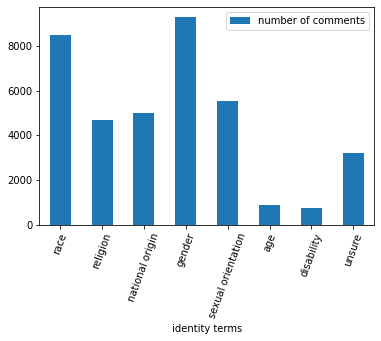

In [ ]:
#plot for identity types ABSOLUTE VALUES
df = pd.DataFrame({'identity terms':['race', 'religion', 'national origin', 
                                     'gender', 'sexual orientation', 
                                     'age', 'disability', 'unsure'], 'number of comments':[8493, 4711, 4997, 9286, 5531, 877, 764, 3198]})
ax = df.plot.bar(x='identity terms', y='number of comments', rot=70)

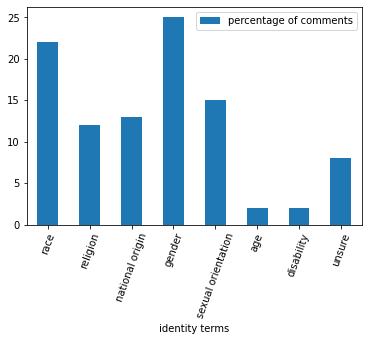

In [ ]:
#PERCENTAGE VALUES FOR IDENTITY

df = pd.DataFrame({'identity terms':['race', 'religion', 'national origin', 
                                     'gender', 'sexual orientation', 
                                     'age', 'disability', 'unsure'], 'percentage of comments':[22, 12, 13, 25, 15, 2, 2, 8]})
ax = df.plot.bar(x='identity terms', y='percentage of comments', rot=70)

In [ ]:
#variable that includes columns for race 

race_attributes = data_identity[['black', 'latinx', 'asian', 'middle_eastern', 
                                'pacific_islander', 'white', 'other_race']]

In [ ]:
#loop and sum 
total_race = 0

for col in race_attributes:
  print(col, race_attributes[col].sum(), '% is', (((round(race_attributes[col].sum()/11251, 2) *100))))
  
  total_race += race_attributes[col].sum()

print('total is', total_race) 


black 3672.0 % is 33.0
latinx 1281.0 % is 11.0
asian 1075.0 % is 10.0
middle_eastern 1621.0 % is 14.000000000000002
pacific_islander 415.0 % is 4.0
white 2244.0 % is 20.0
other_race 943.0 % is 8.0
total is 11251.0


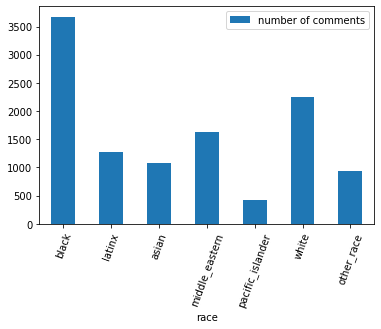

In [ ]:
#plot for race ABSOLUTE
df = pd.DataFrame({'race':['black', 'latinx', 'asian', 
                                     'middle_eastern', 'pacific_islander', 
                                     'white', 'other_race'], 'number of comments':[3672, 1281, 1075, 1621, 415, 2244, 943]})
ax = df.plot.bar(x='race', y='number of comments', rot=70)

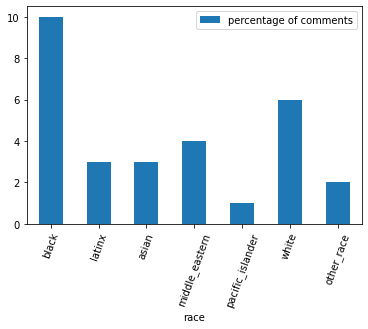

In [ ]:
#plot for race PERCENTAGE
df = pd.DataFrame({'race':['black', 'latinx', 'asian', 
                                     'middle_eastern', 'pacific_islander', 
                                     'white', 'other_race'], 'percentage of comments':[10, 3, 3, 4, 1, 6, 2]})
ax = df.plot.bar(x='race', y='percentage of comments', rot=70)

In [ ]:
#variable that includes columns for religion

religion_attributes = data_identity[['jews', 'christians', 'buddhists', 
                                   'hindus', 'mormons', 'atheists',
                                   'muslims', 'other_religion']]

In [ ]:
#loop and sum
total_religion = 0
for col in religion_attributes:

  print(col, religion_attributes[col].sum(), '% is', (((round(religion_attributes[col].sum()/6473, 2)*100))))
  total_religion += religion_attributes[col].sum()

print('total religion is', total_religion)

jews 1031.0 % is 16.0
christians 1605.0 % is 25.0
buddhists 256.0 % is 4.0
hindus 436.0 % is 7.000000000000001
mormons 285.0 % is 4.0
atheists 341.0 % is 5.0
muslims 1920.0 % is 30.0
other_religion 599.0 % is 9.0
total religion is 6473.0


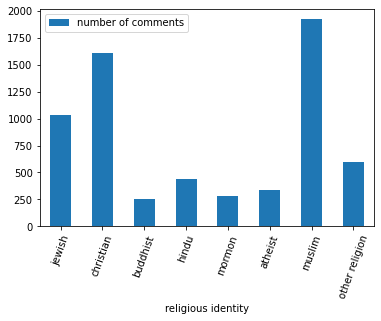

In [ ]:
df = pd.DataFrame({'religious identity':['jewish', 'christian', 'buddhist', 
                                     'hindu', 'mormon', 
                                     'atheist', 'muslim', 'other religion'], 'number of comments':[1031, 1605, 256, 436, 285, 341, 1920, 599]})
ax = df.plot.bar(x='religious identity', y='number of comments', rot=70)

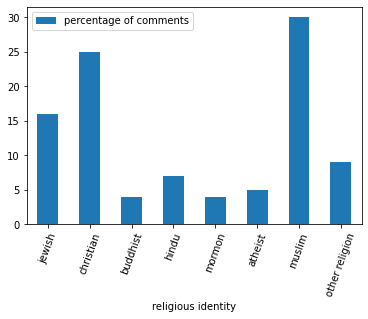

In [ ]:
df = pd.DataFrame({'religious identity':['jewish', 'christian', 'buddhist', 
                                     'hindu', 'mormon', 
                                     'atheist', 'muslim', 'other religion'], 'percentage of comments':[16, 25, 4, 7, 4, 5, 30, 9]})
ax = df.plot.bar(x='religious identity', y='percentage of comments', rot=70)

In [ ]:
#variable that includes columns for national origin 

national_origin_attributes = data_identity[['country', 'immigrant', 'migrant_worker',
                                            'undocumented', 'other_nationality']]

In [ ]:
#sum and loop
total_national_origin = 0
for col in national_origin_attributes:
  print(col, national_origin_attributes[col].sum(), '% is', (((round(national_origin_attributes[col].sum()/6693, 2)*100))))
  total_national_origin += national_origin_attributes[col].sum()
print('total national origin', total_national_origin)

country 3091.0 % is 46.0
immigrant 1545.0 % is 23.0
migrant_worker 493.0 % is 7.000000000000001
undocumented 1043.0 % is 16.0
other_nationality 521.0 % is 8.0
total national origin 6693.0


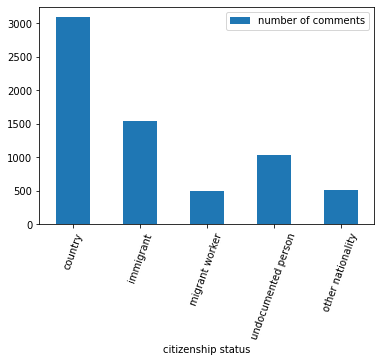

In [ ]:
df = pd.DataFrame({'citizenship status':['country', 'immigrant', 'migrant worker', 
                                     'undocumented person', 'other nationality'], 
                   'number of comments':[3091, 1545, 493, 1043, 521]})
ax = df.plot.bar(x='citizenship status', y='number of comments', rot=70)

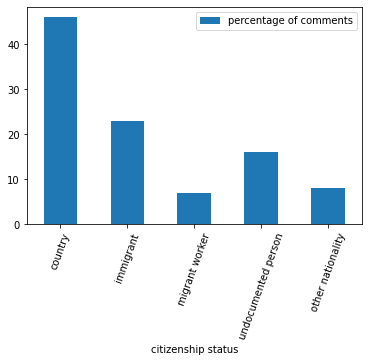

In [ ]:
df = pd.DataFrame({'citizenship status':['country', 'immigrant', 'migrant worker', 
                                     'undocumented person', 'other nationality'], 
                   'percentage of comments':[46, 23, 7, 16, 8]})
ax = df.plot.bar(x='citizenship status', y='percentage of comments', rot=70)

In [ ]:
#variable that includes columns for gender 

gender_attributes = data_identity[['men', 'women', 'non-binary', 
                                   'transgender_women', 'transgender_men', 
                                   'transgender_unspecified', 'other_gender']]


In [ ]:
#loop and sum
total_gender = 0

for col in gender_attributes:
  print(col, gender_attributes[col].sum(), '% is', (((round(gender_attributes[col].sum()/12041, 2)*100))))
  total_gender += gender_attributes[col].sum()
print('total gender', total_gender)

men 2820.0 % is 23.0
women 6592.0 % is 55.00000000000001
non-binary 479.0 % is 4.0
transgender_women 596.0 % is 5.0
transgender_men 744.0 % is 6.0
transgender_unspecified 660.0 % is 5.0
other_gender 150.0 % is 1.0
total gender 12041.0


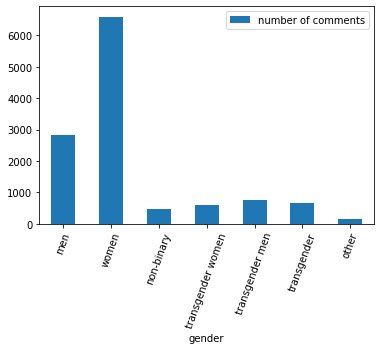

In [ ]:
df = pd.DataFrame({'gender':['men', 'women', 'non-binary', 
                                     'transgender women', 'transgender men', 
                                     'transgender', 'other'], 'number of comments':[2820, 6592, 479, 596, 744, 660, 150]})
ax = df.plot.bar(x='gender', y='number of comments', rot=70)

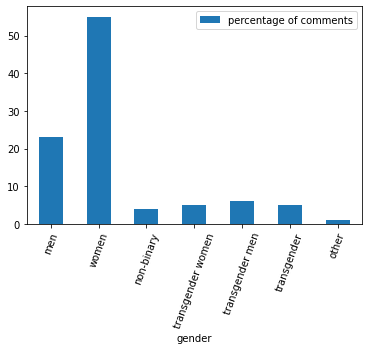

In [ ]:
df = pd.DataFrame({'gender':['men', 'women', 'non-binary', 
                                     'transgender women', 'transgender men', 
                                     'transgender', 'other'], 'percentage of comments':[23, 55, 4, 5, 6, 5, 1]})
ax = df.plot.bar(x='gender', y='percentage of comments', rot=70)

In [ ]:
print(data_identity.columns.values)


['comment_id' 'platform' 'uid' 'predict_text' 'measure' 'std_err'
 'num_ratings' 'infitms' 'outfitms' 'identity' 'hypothesis' 'race'
 'religion' 'national_origin' 'gender' 'sexual_orientation' 'age'
 'disability' 'unsure' 'black' 'latinx' 'asian' 'middle_eastern'
 'native_american' 'pacific_islander' 'white' 'other_race'
 'other_race_text' 'jews' 'christians' 'buddhists' 'hindus' 'mormons'
 'atheists' 'muslims' 'other_religion' 'other_religion_text' 'country'
 'immigrant' 'migrant_worker' 'undocumented' 'other_nationality'
 'other_nationality_text' 'men' 'women' 'non-binary' 'transgender_women'
 'transgender_men' 'transgender_unspecified' 'other_gender'
 'other_gender_text' 'bisexual' 'gay' 'lesbian' 'heterosexual'
 'other_sexuality' 'other_sexuality_text' 'children' 'adolescents'
 'adults' 'middle-aged' 'seniors' 'other_age' 'other_age_text'
 'physical_disability' 'cognitive_disability' 'mental_health'
 'visually_impaired' 'hearing_impaired' 'not_specific' 'other_disability'
 'other_d

In [ ]:
#variable that includes columns for sexual orientation 

sexual_orientation_attributes = data_identity[['bisexual', 'gay', 'lesbian',
                                               'heterosexual', 'other_sexuality']]

In [ ]:
#loop and sum 

total_sexual_orientation = 0

for col in sexual_orientation_attributes:
  
  print(col, sexual_orientation_attributes[col].sum(), '% is', (((round(sexual_orientation_attributes[col].sum()/8998, 2)*100))))
  total_sexual_orientation += sexual_orientation_attributes[col].sum()

print('total sexual orientation', total_sexual_orientation)



# total_gender = 0

# for col in gender_attributes:
#   print(col, gender_attributes[col].sum(), '% is', (((round(gender_attributes[col].sum()/12041, 2)*100))))
#   total_gender += gender_attributes[col].sum()
# print('total gender', total_gender)

bisexual 1650.0 % is 18.0
gay 3690.0 % is 41.0
lesbian 1378.0 % is 15.0
heterosexual 1745.0 % is 19.0
other_sexuality 535.0 % is 6.0
total sexual orientation 8998.0


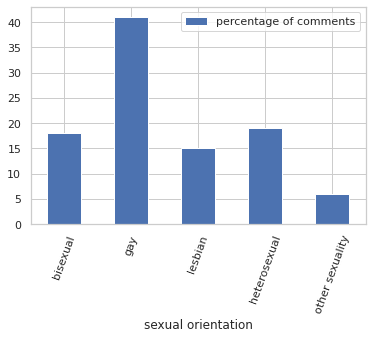

In [ ]:
df = pd.DataFrame({'sexual orientation':['bisexual', 'gay', 'lesbian', 
                                     'heterosexual', 'other sexuality'], 
                   'percentage of comments':[18, 41, 15, 19, 6]})
ax = df.plot.bar(x='sexual orientation', y='percentage of comments', rot=70)

In [ ]:
df = pd.DataFrame({'sexual orientation':['bisexual', 'gay', 'lesbian', 
                                     'heterosexual', 'other sexuality'], 
                   'percentage of comments':[1650, 3690, 1378, 1745, 535]})
ax = df.plot.bar(x='sexual orientation', y='number of comments', rot=70)

KeyError: ignored

In [ ]:
#variable that includes columns for age

age_attributes = data_identity[['children', 'adolescents', 'adults', 
                                'middle-aged', 'seniors', 'other_age']]

In [ ]:
#loop and sum 
total_age = 0 
for col in age_attributes:
  print(col, age_attributes[col].sum(), '% is', (((round(age_attributes[col].sum()/1495, 2)*100))))
  total_age += age_attributes[col].sum()
print('total age is', total_age)

children 227.0 % is 15.0
adolescents 280.0 % is 19.0
adults 485.0 % is 32.0
middle-aged 272.0 % is 18.0
seniors 196.0 % is 13.0
other_age 35.0 % is 2.0
total age is 1495.0


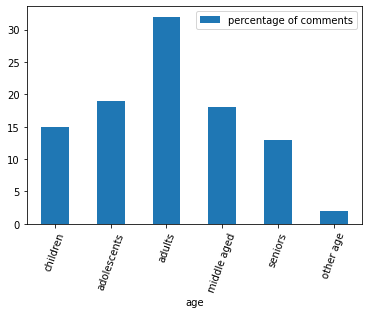

In [ ]:
df = pd.DataFrame({'age': ['children', 'adolescents', 'adults', 
                                     'middle aged', 'seniors', 'other age'], 
                   'percentage of comments':[15, 19, 32, 18, 13, 2]})

ax = df.plot.bar(x='age', y='percentage of comments', rot=70)

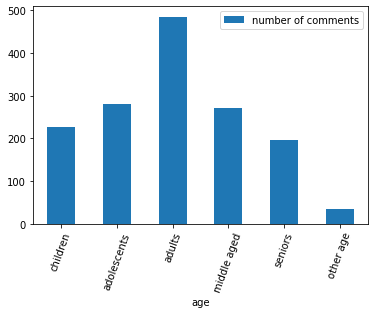

In [ ]:
df = pd.DataFrame({'age': ['children', 'adolescents', 'adults', 
                                     'middle aged', 'seniors', 'other age'], 
                   'number of comments':[227, 280, 485, 272, 196, 35]})

ax = df.plot.bar(x='age', y='number of comments', rot=70)

In [ ]:
#variable that includes columns for disability 

disability_attributes = data_identity[['physical_disability', 'cognitive_disability', 'mental_health',
                          'visually_impaired', 'hearing_impaired', 'not_specific', 
                          'other_disability']]

In [ ]:
#loop and sum
total_disability = 0
for col in disability_attributes:

  total_disability += disability_attributes[col].sum()
  print(col, disability_attributes[col].sum(), '% is', (((round(disability_attributes[col].sum()/1079, 2)*100))))

print('total disability', total_disability)

physical_disability 112.0 % is 10.0
cognitive_disability 399.0 % is 37.0
mental_health 194.0 % is 18.0
visually_impaired 74.0 % is 7.000000000000001
hearing_impaired 73.0 % is 7.000000000000001
not_specific 176.0 % is 16.0
other_disability 51.0 % is 5.0
total disability 1079.0


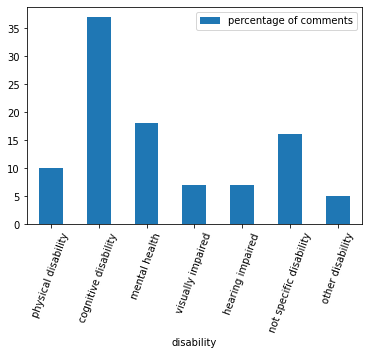

In [ ]:
df = pd.DataFrame({'disability':['physical disability', 'cognitive disability', 'mental health', 
                                     'visually impaired', 'hearing impaired', 
                                     'not specific disability', 'other disability'], 
                   'percentage of comments':[10, 37, 18, 7, 7, 16, 5]})
ax = df.plot.bar(x='disability', y='percentage of comments', rot=70)

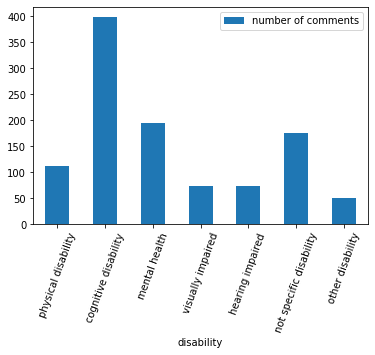

In [ ]:
df = pd.DataFrame({'disability':['physical disability', 'cognitive disability', 'mental health', 
                                     'visually impaired', 'hearing impaired', 
                                     'not specific disability', 'other disability'], 
                   'number of comments':[112, 399, 194, 74, 73, 176, 51]})
ax = df.plot.bar(x='disability', y='number of comments', rot=70)

In [ ]:
#attack_type_attribute = data_identity[['respect', 'insult', 'humiliate', 
                          #'status', 'dehumanize', 'violence_phys',
                          #'genocide', 'attack_defend', 'hatespeech']]

In [ ]:
#cut identity columns by platform
#ie perhaps there's certain type of HS on these platforms that are different


In [ ]:
## Ask Geoff - what does the unsure q_39 mean?
## Ask Geoff - what does demo_race_ethnicitie_1-7 mean? likewise with religion etc

In [ ]:
#these are absolute values, do percentages instead [done]

#stacked barplot by each different label (hate speech, dehumanizing, etc)
#filter by comments that are actuall hate speech 
#there are 4 reviewers per comment, figureo ut how to visualize that

#look into the other column - disability specifically seems to have something related to 
#fat people + HIV-positive people 

# **Filtering the Data by Comment Category: Hate Speech, Dehumanizing Speeech, etc**

***Appendix A
A.1 Scale items from labeling instrument***

***Table A1. Scale items from labeling instrument. These items operationalize our hate speech construct and are aggregated
into a continuous score via Rasch measurement theory.***


Item name / Prompt/ Response options

***Identities*** a 
Is the comment above directed at or about any individual or
groups based on: (multiple selections allowed)

Race or ethnicity, religion, national ori-
gin or citizenship status, gender, sex-
ual orientation, age, disability status, or
none of the above

1. ***Sentiment*** How would you describe the sentiment of this comment? Strongly negative, somewhat negative,
neutral, somewhat positive, strongly
positive
2. ***Respect*** Is this comment respectful towards the group(s) you previously
identified?
Strongly disrespectful, disrespectful,
neutral, respectful, strongly respectful
3. ***Insult*** Do you agree or disagree with the following statement: This com-
ment is insulting towards the group(s) you previously identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
4. ***Humiliate*** Do you agree or disagree with the following statement: This com-
ment is humiliating towards the group(s) you previously identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
5. ***Status*** This comment states that the group(s) you previously identified
is:
Strongly inferior, inferior, neither supe-
rior nor inferior, superior, strongly su-
perior
6. ***Dehumanize*** Do you agree or disagree with the following statement: This com-
ment dehumanizes the group(s) you previously identified (e.g., by
comparing them to an animal).
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
7. ***Violence*** Do you agree or disagree with the following statement: This com-
ment calls for using violence against the group(s) you previously
identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
8. ***Genocide*** Do you agree or disagree with the following statement: This com-
ment calls for the deliberate killing of a large group of people from
the group(s) you previously identified.
Strongly disagree, disagree, neither dis-
agree nor agree, agree, strongly agree
9. ***Attack-Defend*** Is the comment attacking or defending the group(s) you previously
identified?
Strongly defending, defending, nei-
ther defending nor attacking, attacking,
strongly attacking
10. ***Hate speech***
(binary)
Does this comment contain hate speech, defined as “bias-motivated,
hostile and malicious language targeted at a person/group because of
their actual or perceived innate characteristics, especially when the
group is unnecessarily labeled (e.g., ”jew bankers”, ’n hooligans’).” The
comment contains hate speech if slurs or derogatory language are used
toward any person or group regardless of whether or not the target is
a member of the slur-target group. (e.g. a comment calling Trump a
faggot or a n***** still contains hate speech).
Yes, no, unclear
aThis item is converted to a binary value of 0 if no identities are present and 1 if any identities are present. It is not directly used in the scale but if
a comment is not flagged as having at least one identity group target then the remaining scale items are skipped in our labeling instrument.






In [ ]:
#one of the things that sticks out to me is that we're saying we're predicting hate speech
#but at the same time hate speech is a variable in there, at the same level as dehumanization for example


In [ ]:
data_multi.head(5)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.200000,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39773,twitter,1159364387838341120,The trans women reading this tweet right now i...,-6.52,1.00,3,0.333333,1,1.0,2790,-0.35,0.57,0.42,0.96,0.43,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,47101,youtube,UgytWyMwDquehpAEspl4AaABAg,Question: These 4 broads who criticize America...,0.36,0.31,4,0.250000,1,1.0,3379,-0.48,1.16,0.67,0.90,0.74,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43625,youtube,Ugxgvb5k_yZm2w5V-v94AaABAg,It is about time for all illegals to go back t...,0.26,0.29,4,0.250000,1,1.0,7365,0.86,1.18,0.87,0.81,0.68,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,127.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,12538,reddit,euol97y,For starters bend over the one in pink and kic...,1.54,0.51,2,0.500000,1,1.0,488,-0.54,0.95,1.00,0.76,0.63,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,112.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225


In [ ]:
sort_by_sentiment = data_multi.sort_values('sentiment', ascending =False)

In [ ]:
#sort_by_sentiment.head(10)

In [ ]:
#sort_by_sentiment.tail(10)

so chris said that looking at the raw scale items wouldn't be as useful bc we have a threshold that we set through the reference commments in order to adequately interpret those absolute numbers

scores are 0-4 (not very x, not x, neutral, x, very x)


In [ ]:
sort_by_respect = data_multi.sort_values('respect', ascending=False)

In [ ]:
sort_by_respect.head(10)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
67778,4.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,13865,reddit,evilxet,Fuck da Police. Trigger happy morons.,4.26,1.90,1,1.000000,1,4.0,9283,-0.75,0.85,0.77,1.00,1.00,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,113.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,38.8184051513671875,-77.62020111083984375,0.807299,-0.110675
83345,4.0,4.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,2169,reddit,epizxyd,I'm sure its a coincidence that all the asshol...,1.72,0.47,2,0.500000,1,1.0,8640,0.58,1.00,0.78,2.09,1.61,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,,109.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.0543975830078125,-118.2440032958984375,0.975013,-0.191221
83358,4.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0,1.0,3186,reddit,eppjcn0,Is the person behind this account some [SLUR] ...,1.08,0.31,4,0.250000,1,1.0,7652,0.04,1.11,0.65,0.72,0.64,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,,109.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,2.0,27.4228973388671875,-97.8406982421875,0.928385,-0.090164
83357,4.0,4.0,3.0,2.0,0.0,1.0,0.0,0.0,3.0,1.0,3159,reddit,eppdx9e,Oh my fucking God. You have a pussy to worship...,-1.82,0.30,4,0.250000,1,1.0,10409,-0.61,1.12,0.91,3.87,3.31,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,NaN,1.0,NaN,NaN,NaN,,2.0,26.6929931640625,-81.91249847412109375,0.863955,0.291652
83356,4.0,4.0,3.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,33959,twitter,1156122476038037505,Had to unfollow this pretty girl because she's...,0.95,0.46,2,0.500000,1,1.0,1135,-0.07,0.72,0.69,0.66,0.65,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,120.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,44.8260955810546875,-93.35379791259765625,0.820630,-0.165193
83355,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,46644,youtube,Ugyo7AwnZ3vbl01sOJt4AaABAg.8xDTeOKeJDE8xDVYWlt43F,And you just wrote a whole fuckin paragraph in...,1.49,0.32,4,0.250000,1,1.0,2027,0.56,1.29,1.18,0.88,0.91,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,140.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,3.0,40.267303466796875,-74.948699951171875,0.888050,0.117861
83353,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,0.0,49192,youtube,UgzonlH3-YXs7ipd0f14AaABAg.8valFX7EMCP8vawLXXSS8r,My dog has a higher IQ than you're transge

In [ ]:
#what do i want to look at here? the distribution of scores across comments, in other
#words how many of these comments are labeled as 4 or 3 or 2 etc?

In [ ]:
#comment_data = data_multi['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize', 'violence_phys', 'genocide', 'attack_defend', 'hatespeech', 'comment_id']
comment_data = data_multi.iloc[:, 0:10]
#comment_data.to_csv('comment_data.csv')



In [ ]:
comment_data['sentiment'].value_counts()

4.0    61435
3.0    35243
2.0    19785
0.0     9658
1.0     9435
Name: sentiment, dtype: int64

In [ ]:
sentiment = comment_data['sentiment']

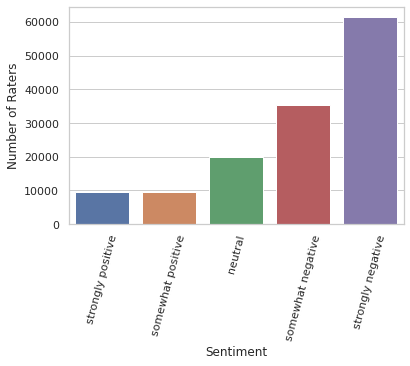

In [ ]:
import seaborn as sns
sns.set(style='whitegrid')
ax = sns.countplot(x='sentiment', data=comment_data)
labels = ['strongly positive', 'somewhat positive', 'neutral', 'somewhat negative', 'strongly negative']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Sentiment')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


#plt.xticks(sentiment, ('strongly positive', 'somewhat positive', 'neutral', 
           #'somewhat negative', 'strongly negative'))

In [ ]:
genocide = comment_data['genocide'] #you don't have to do this step, you can just do step 2 
comment_data['genocide'].value_counts()
#genocide.value_counts()

0.0    121003
1.0     14553
Name: genocide, dtype: int64

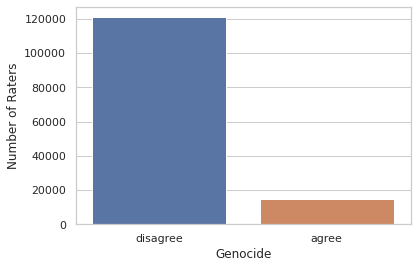

In [ ]:

sns.set(style='whitegrid')
ax = sns.countplot(x='genocide', data=comment_data)

labels = ['disagree', 'agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Genocide')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
#forloop
#hue in seaborn for cluster barplots

how many comments were labeled as [insert term here] ? 
out of those comments labeled, how many of them had to do with [insert identity here]

so above is a question of quantity, next we want to look at a question of degree 
(in which you'll have to look at degree)
also it's 4 raters per comment right, so where can we see that? this dataset just shows us one raters decision
you also have to rename the target identities 1-7 etc to correspond to race, gender, etc for this dataset

In [ ]:
data_multi.head(5)


,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.200000,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39773,twitter,1159364387838341120,The trans women reading this tweet right now i...,-6.52,1.00,3,0.333333,1,1.0,2790,-0.35,0.57,0.42,0.96,0.43,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,47101,youtube,UgytWyMwDquehpAEspl4AaABAg,Question: These 4 broads who criticize America...,0.36,0.31,4,0.250000,1,1.0,3379,-0.48,1.16,0.67,0.90,0.74,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43625,youtube,Ugxgvb5k_yZm2w5V-v94AaABAg,It is about time for all illegals to go back t...,0.26,0.29,4,0.250000,1,1.0,7365,0.86,1.18,0.87,0.81,0.68,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,127.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,12538,reddit,euol97y,For starters bend over the one in pink and kic...,1.54,0.51,2,0.500000,1,1.0,488,-0.54,0.95,1.00,0.76,0.63,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,112.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225


In [ ]:
data_multi.sort_values('comment_id', ascending=False)

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
85858,4.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,3.0,1.0,50070,youtube,UgzZzkD4mjyobFJXYIt4AaABAg,Fuck you go die you fucking [SLUR] bitch ugly ...,2.43,0.45,3,0.333333,1,1.0,7647,0.65,0.76,0.59,1.23,1.79,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,135.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,6.0,40.0988006591796875,-85.684600830078125,0.971133,0.553509
15481,4.0,4.0,3.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,50070,youtube,UgzZzkD4mjyobFJXYIt4AaABAg,Fuck you go die you fucking [SLUR] bitch ugly ...,2.43,0.45,3,0.333333,1,1.0,3313,-0.22,1.23,1.26,1.23,1.79,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,158.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,42.3394012451171875,-122.847503662109375,0.971133,0.553509
40975,4.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,50070,youtube,UgzZzkD4mjyobFJXYIt4AaABAg,Fuck you go die you fucking [SLUR] bitch ugly ...,2.43,0.45,3,0.333333,1,1.0,8656,0.06,0.94,0.97,1.23,1.79,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,116.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,2.0,34.399200439453125,-118.9181976318359375,0.971133,0.553509
30185,4.0,4.0,2.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,50069,youtube,UgzzZ4x9b_VI52J3j2p4AaABAg,Yikes!!! Bad enough she'shard to look at.every...,0.81,0.36,1,1.000000,1,1.0,9083,0.42,0.92,1.08,0.47,0.48,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,137.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Pagan,NaN,NaN,1.0,NaN,NaN,,4.0,43.32110595703125,-76.4033966064453125,0.055487,-0.136107
55109,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,50068,youtube,UgzzyVUaEAt5QKvf_t14AaABAg,That Kenyan girl is gorgeous!,-4.28,0.57,2,0.500000,1,1.0,3763,0.75,0.73,0.52,1.33,0.50,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,36.331207275390625,-92.37529754638671875,0.878128,-1.230516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10872,3.0,3.0,2.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2,reddit,enxneza,"You've caught the big [SLUR] gay, it's known t...",0.03,0.34,3,0.333333,1,1.0,8015,-0.42,0.75,0.87,0.55,0.53,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN

In [ ]:
#let's do a group by here
 #df.groupby("state")["last_name"].count()

group_by_comment_id = data_multi.groupby("comment_id").count().reset_index()
group_by_comment_id.sort_values('comment_id', ascending=False)

#group_by_comment_id.head(5)

#we think that what we're looking at in the columns is actually just the number of raters
#so it's not necessarily 4 raters per comment
#one question to ask here then would be how many raters were assigned to each comment?



,comment_id,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
39564,50070,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3,3,3,3,0,0,0,0,0,0,3,0,3,3,3,0,0,2,0,0,0,0,1,0,3,3,0,0,0,0,3,3,3,3,3,3
39563,50069,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,1,1,1,1
39562,50068,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,0,0,0,0,0,0,2,0,2,2,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,2,2,2,2,2,2
39561,50067,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1
39560,50066,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1,0,3,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,4,4,4,4,4,0,0,1,0,0,0,3,0,4,4,4,0,0,4,0,0,0,0,0,0,4,4,0,0,0,0,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,3,0,0,0,3,3,0,0,0,0,...,0,0,0,3,3,3,3,3,0,0,0,0,0,0,3,0,3,3,3,2,0,1,0,0,0,0,0,0,3,1,0,1,1,0,3,3,3,3,3,3
3,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,2,2,0,1,0,0,0,0,2,1,2,2,2,2,0,0,0,0,0,0,0,1,2,1,0,1,0,0,2,2,2,2,2,2
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,3,3,3,3,3,0,0,0,0,0,0,3,0,3,3,3,1,0,1,0,0,0,0,1,0,3,2,0,1,0,0,3,3,3,3,3,3
1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,3,0,0,0,0,0,0,0,0,0,...,0,0,0,3,3,3,3,3,0,1,0,0,0,0,2,0,3,3,3,0,0,2,0,0,0,0,1,0,3,2,1,0,0,0,3,3,3,3,3,3


In [ ]:
comment_data['respect'].value_counts()

4.0    58473
3.0    30720
2.0    23895
0.0    12839
1.0     9629
Name: respect, dtype: int64

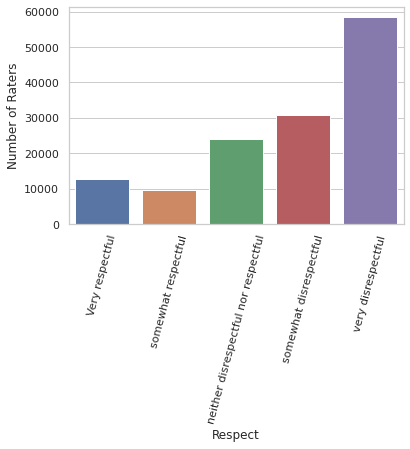

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='respect', data=comment_data)

labels = ['Very respectful', 'somewhat respectful', 'neither disrespectful nor respectful', 'somewhat disrespectful', 'very disrespectful']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Respect')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


In [ ]:
comment_data['insult'].value_counts()

3.0    44153
2.0    39673
0.0    33143
1.0    18587
Name: insult, dtype: int64

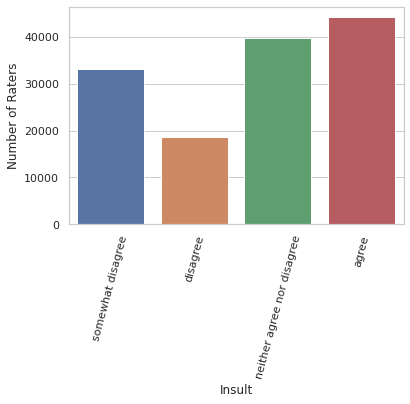

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='insult', data=comment_data)

labels = ['somewhat disagree', 'disagree', 'neither agree nor disagree', 'agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Insult')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 




In [ ]:
comment_data['humiliate'].value_counts()

0.0    65896
1.0    39382
2.0    30278
Name: humiliate, dtype: int64

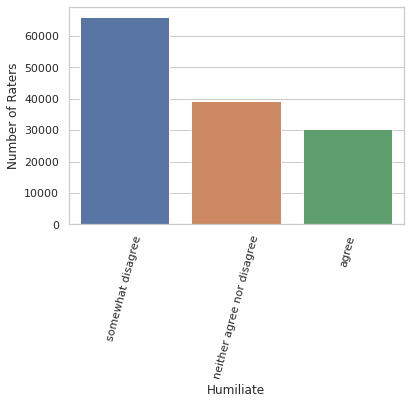

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='humiliate', data=comment_data)

labels = ['somewhat disagree', 'neither agree nor disagree', 'agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Humiliate')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 



In [ ]:
comment_data['status'].value_counts()

1.0    68913
0.0    66643
Name: status, dtype: int64

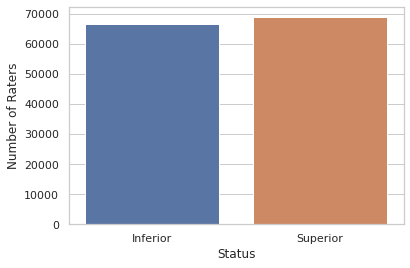

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='status', data=comment_data)

labels = ['Inferior', 'Superior']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Status')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
comment_data['dehumanize'].value_counts()

0.0    85581
1.0    49975
Name: dehumanize, dtype: int64

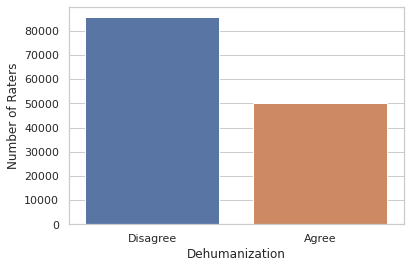

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='dehumanize', data=comment_data)

labels = ['Disagree', 'Agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Dehumanization')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
comment_data['violence_phys'].value_counts()

0.0    110890
1.0     24666
Name: violence_phys, dtype: int64

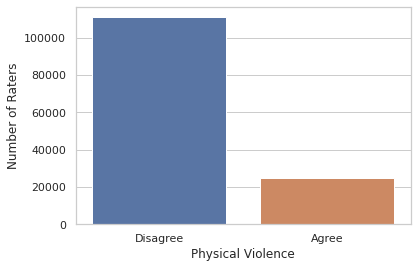

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='violence_phys', data=comment_data)

labels = ['Disagree', 'Agree']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Physical Violence')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(0) 


In [ ]:
comment_data['attack_defend'].value_counts()

2.0    44883
1.0    38201
3.0    33468
0.0    19004
Name: attack_defend, dtype: int64

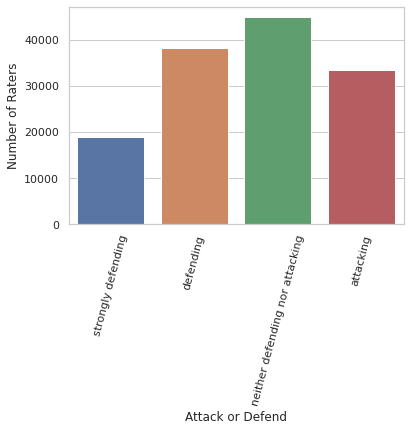

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='attack_defend', data=comment_data)

labels = ['strongly defending', 'defending', 'neither defending nor attacking', 'attacking']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Attack or Defend')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


In [ ]:
comment_data['hatespeech'].value_counts()

0.0    89535
1.0    46021
Name: hatespeech, dtype: int64

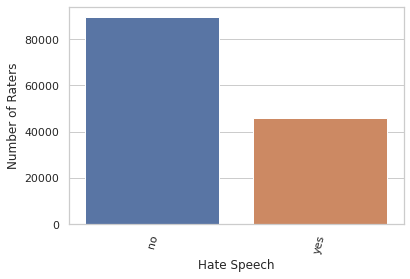

In [ ]:
sns.set(style='whitegrid')
ax = sns.countplot(x='hatespeech', data=comment_data)


labels = ['no', 'yes']
          
ax.set_xticklabels(labels)
ax.set_ylabel('Number of Raters')
ax.set_xlabel('Hate Speech')


for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 


so what we have above is the distribution of degrees for the different dimensions, ie humiliate, sentiment, status, etc - some of them are binary (0,1) by definition the others are categorical (0-4) 

the other questions i'll want to ask here relate to the demographic background of the raters themselves - and how that may correlate with particular interpretations of the text (does this count as racism? and if so, how severe it is, for example)

# **NEW SECTION: RATERS DEMOGRAPHIC BACKGROUND**

In [ ]:
#cluster the demographic groups, so if race = black, race = white, race = latinx (on the x axis) how much content did they identify
#as problematic towards black people? or POC generally?

#this might be hard to quantify bc you have random chance intervening, how many labelers were given content relating to 
#types of hate speech against POC, etc? and since they're creating ground truth, you couldn't do a ratio of 
#number of identified as hate speech against POC [yes / no] / actually hate speech against POC confirmed

#could we do some analysis to determine if the differences are statistically significant intstead of just plotting the data viz?
#like maybe some t-tests or something like that

#another way to get to this, would be to look at the 3-4 reviewers per post and see variation in the lablers for those posts,
#so it's kinda like holding constant for being assigned to a particular post that may or may not have hate speech against a 
#given group 


 "demo_gender",  # Annotator's gender
    "demo_gender_4_text",
    "demo_trans",  # Does the annotator identity as transgender?
    "demo_educ",  # Annotator's education
    "demo_race_ethnicitie_1",  # Annotator's ethnicity
    "demo_race_ethnicitie_2",
    "demo_race_ethnicitie_3",
    "demo_race_ethnicitie_4",
    "demo_race_ethnicitie_5",
    "demo_race_ethnicitie_8",
    "demo_race_ethnicitie_6",
    "demo_race_ethnicitie_7",
    "demo_race_ethnicitie_7_text",
    "demo_age",  # Annotator's age
    "demo_income",  # Annotator's income
    "demo_religion_1",  # Annotator's religion
    "demo_religion_2",
    "demo_religion_11",
    "demo_religion_4",
    "demo_religion_5",
    "demo_religion_7",
    "demo_religion_8",
    "demo_religion_9",
    "demo_religion_10",
    "demo_religion_10_text",
    "demo_sexual_orien_1",  # Annotator's sexual orientation
    "demo_sexual_orien_2",
    "demo_sexual_orien_3",
    "demo_sexual_orien_4",
    "demo_sexual_orien_5",
    "demo_sexual_orien_4_text",
    "demo_ideology",  # Annotator's ideology

In [ ]:
 #renaming the variables so they make sense 
 #data_demo = datamulti(columns={'demo_gender': 'race', 

In [ ]:
data_multi[['labeler_id','demo_gender']]

,labeler_id,demo_gender
0,10873,2.0
1,2790,1.0
2,3379,2.0
3,7365,2.0
4,488,1.0
...,...,...
135551,8590,1.0
135552,8303,1.0
135553,6207,1.0
135554,7886,2.0


In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_gender'])['demo_gender'].value_counts()
 #['demo_gender']
 #.reset_index()

1.0    4426
2.0    3392
3.0      59
5.0      29
4.0       6
Name: demo_gender, dtype: int64

In [ ]:
#data_multi['demo_gender']
#print(data_multi)

#Female(1), Male(2), Nonbinary or third gender (3), Prefer not to say (5), 
#refer to self describe (4)
#np.unique(data_multi['demo_gender'], return_counts=True)
data_multi['demo_gender'].value_counts()


#data_multi['demo_gender'].isnull().sum() 
#answer = 0
#this makes sense bc people who opt-ed out of this question chose number 4

#check for NaN values here to see if they need to be filled
#df['your column name'].isnull().sum()
 


#how to fill nan values with 0s or wahtever is appropriate 

#df['DataFrame Column'] = df['DataFrame Column'].fillna(0)
#df.fillna(0)

1.0    76370
2.0    57582
3.0      985
5.0      500
4.0      119
Name: demo_gender, dtype: int64

In [ ]:
df_gender = pd.DataFrame({'gender':['female', 'male', 'non-binary', 
                                     'declined', 'self desc'], 
                   'number of raters':[4426, 3392, 59, 28, 6]})

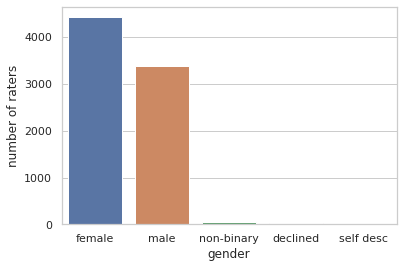

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='gender', y ='number of raters', data=df_gender)
#we can't see 3,4, 5 in this graph even though we know they're significant
#rename x axis and y axis

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_gender_4_text'])['demo_gender_4_text'].value_counts()

                                 7906
cis-gendered                        1
Cis-gendered hetero-normative       1
Agender                             1
gender-fluid                        1
Gender non-conforming               1
agender                             1
Name: demo_gender_4_text, dtype: int64

In [ ]:
#data_multi['demo_gender_4_text']
np.unique(data_multi['demo_gender_4_text'], return_counts=True)
data_multi['demo_gender_4_text'].value_counts() 
#133437 are all unique responses

#np.unique gives me the unique instances 
#return_counts=True gives me the number each instance shows up; default false

                                 135437
Gender non-conforming                25
Agender                              22
gender-fluid                         21
Cis-gendered hetero-normative        19
cis-gendered                         18
agender                              14
Name: demo_gender_4_text, dtype: int64

In [ ]:
np.unique(data_multi['demo_gender_4_text'])

array(['', 'Agender', 'Cis-gendered hetero-normative',
       'Gender non-conforming', 'agender', 'cis-gendered', 'gender-fluid'],
      dtype=object)

In [ ]:
data_multi['demo_gender_4_text']

0          
1          
2          
3          
4          
         ..
135551     
135552     
135553     
135554     
135555     
Name: demo_gender_4_text, Length: 135556, dtype: object

In [ ]:

#np.unique(data_multi['demo_trans'], return_counts=True)

#data_multi['demo_trans'].isnull().sum() 
#the answer to this is 0 here as well

data_multi['demo_trans'].value_counts()

#need to get rid of the nans by basically just turning them into 0s
#so they can be aggregated out np.unique(data_multi['demo_trans'], return_counts=True)

#trans (1), not trans (2), prefer not to say (4)

2.0    133715
1.0      1183
4.0       658
Name: demo_trans, dtype: int64

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_trans'])['demo_trans'].value_counts()

2.0    7806
1.0      67
4.0      39
Name: demo_trans, dtype: int64

In [ ]:
df_trans = pd.DataFrame({'trans':['yes', 'no', 'declined'], 
                   'number of raters':[67, 7806, 39]})

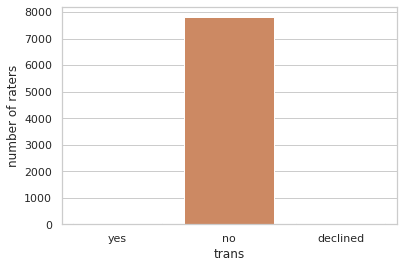

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='trans', y='number of raters', data=df_trans)
#maybe use a stacked bar chart here?

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_educ'])['demo_educ'].value_counts()

6.0    2913
3.0    2064
5.0    1041
2.0     850
7.0     729
8.0     176
9.0      89
1.0      49
Name: demo_educ, dtype: int64

In [ ]:
#np.unique(data_multi['demo_educ'], return_counts=True)
data_multi['demo_educ'].value_counts()
#some high school (1)
#high school graduate (2)
#some college (3)
#college graduate (AA /AS ) (5)
#college graduate (BA / BS) (6)
#masteers degree (MA / MS) (7)
#professional degree (JD / MBA) (8)
#doctoral degree (PhD)

6.0    50206
3.0    35115
5.0    18011
2.0    14138
7.0    12593
8.0     3042
9.0     1562
1.0      872
Name: demo_educ, dtype: int64

In [ ]:
df_educ = pd.DataFrame({'edu level':['high school', 'high school grad', 'college', 
                                     'AA grad', 'BA grad', 'masters', 'professional', 'doctoral'], 
                   'number of raters':[49, 859, 2064, 1041, 2913, 729, 176, 89]})

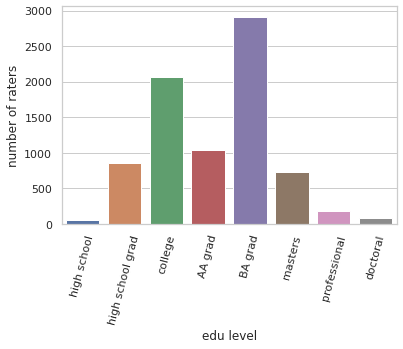

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='edu level', y='number of raters', data=df_educ)

for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_1'], return_counts=True)
#see if there are any NaNs here

#data_multi['demo_race_ethnicitie_1'].isnull().sum()
data_multi['demo_race_ethnicitie_1'].value_counts()
#american indian or alaska native

1.0    2636
Name: demo_race_ethnicitie_1, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_1'])['demo_race_ethnicitie_1'].value_counts()

1.0    154
Name: demo_race_ethnicitie_1, dtype: int64

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_2'], return_counts=True)
data_multi['demo_race_ethnicitie_2'].value_counts()
#asian

1.0    9596
Name: demo_race_ethnicitie_2, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_2'])['demo_race_ethnicitie_2'].value_counts()

1.0    552
Name: demo_race_ethnicitie_2, dtype: int64

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_3'], return_counts=True)
data_multi['demo_race_ethnicitie_3'].value_counts()
#black or african american

1.0    13606
Name: demo_race_ethnicitie_3, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_3'])['demo_race_ethnicitie_3'].value_counts()

1.0    791
Name: demo_race_ethnicitie_3, dtype: int64

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_4'], return_counts=True)
data_multi['demo_race_ethnicitie_4'].value_counts()
#hispanic or latino

1.0    9501
Name: demo_race_ethnicitie_4, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_4'])['demo_race_ethnicitie_4'].value_counts()

1.0    560
Name: demo_race_ethnicitie_4, dtype: int64

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_5'], return_counts=True)

data_multi['demo_race_ethnicitie_5'].value_counts()
#native hawaiian / pacific islander

1.0    483
Name: demo_race_ethnicitie_5, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_5'])['demo_race_ethnicitie_5'].value_counts()

1.0    28
Name: demo_race_ethnicitie_5, dtype: int64

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_6'], return_counts=True)
data_multi['demo_race_ethnicitie_6'].value_counts()
#white

1.0    109090
Name: demo_race_ethnicitie_6, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_6'])['demo_race_ethnicitie_6'].value_counts()

1.0    6373
Name: demo_race_ethnicitie_6, dtype: int64

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_7'], return_counts=True)
#these are just the number of people that wrote 'other' 
#these are the number of people who identified with other

data_multi['demo_race_ethnicitie_7'].value_counts()

1.0    1425
Name: demo_race_ethnicitie_7, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_7'])['demo_race_ethnicitie_7'].value_counts()

1.0    80
Name: demo_race_ethnicitie_7, dtype: int64

In [ ]:
np.unique(data_multi['demo_race_ethnicitie_7_text'], return_counts=False)
#these are the number of people that responded with 'other' 
#and what they wrote in the fill in the blank 
#the majority were empty ''

array(['', 'A mutt', 'AFRO Latinx', 'Afro Caribbean Indian',
       'Amer-Asian (Chinese, Swiss, German, Portugese descent)',
       'American', 'American State National', 'Asian American',
       'Black American', 'CAUCASIAN', 'Caribbean', 'Caribbean-American',
       'Egyptian-American', 'European', 'European American',
       'German-American', 'Human', 'I also identify as a sea-turtle.',
       'I bleed red. American I suppose.', 'Irish', 'Irish American',
       'Italian', 'Italian Greek Jewish', 'Jew', 'Jewish', 'Mixed',
       'Mixed Caribbean', 'Mixed, prefer not to answer further',
       'Mixed/HUMAN RACE', 'Mixed: White, Jewish, Black', 'Morrish',
       'Multicultural', 'Multiracial', 'Mutt', 'Polish, Jewish', 'Romani',
       'Sami', 'South Asian', 'Two or more races', 'West Indian',
       'caucasian', 'human', 'jew', 'mixed', 'mixed indian-african',
       'mixed race', 'multi', 'multi-ethnic', 'multiracial',
       'prefer not to say', 'the only race is human'], dtype=o

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_7_text'])['demo_race_ethnicitie_7_text'].value_counts()

                                                          7837
Jewish                                                      10
mixed                                                        5
Mixed                                                        5
European American                                            3
prefer not to say                                            2
human                                                        2
jew                                                          2
Human                                                        2
Multicultural                                                2
mixed race                                                   2
I also identify as a sea-turtle.                             1
Mutt                                                         1
Polish, Jewish                                               1
I bleed red. American I suppose.                             1
Morrish                                                

In [ ]:
#np.unique(data_multi['demo_race_ethnicitie_8'], return_counts=True)
data_multi['demo_race_ethnicitie_8'].value_counts()
#middle eastern

1.0    827
Name: demo_race_ethnicitie_8, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_race_ethnicitie_8'])['demo_race_ethnicitie_8'].value_counts()

1.0    51
Name: demo_race_ethnicitie_8, dtype: int64

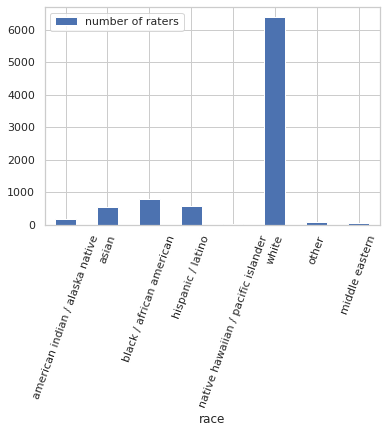

In [ ]:
#race_ethnicities = []
#sns.barplot()

df = pd.DataFrame({'race':['american indian / alaska native', 'asian', 'black / african american', 
                                       'hispanic / latino', 'native hawaiian / pacific islander', 'white', 
                                     'other', 'middle eastern'], 
                   'number of raters':[154, 552, 791, 560, 28, 6373, 80, 51]})


ax = df.plot.bar(x='race', y='number of raters', rot=70)

In [ ]:
#np.unique(data_multi['demo_age'], return_counts=True)

data_multi['demo_age'].value_counts()


#year of birth 
#2002(1)....1919(185)

119.0    5977
114.0    5844
116.0    5834
117.0    5591
120.0    5433
         ... 
165.0      46
160.0      35
163.0      21
166.0      21
164.0      21
Name: demo_age, Length: 63, dtype: int64

In [ ]:
 df_age = data_multi.drop_duplicates(['labeler_id', 'demo_age'])['demo_age'].value_counts().reset_index()
 df_age

,index,demo_age
0,119.0,364
1,116.0,349
2,114.0,348
3,117.0,338
4,120.0,318
...,...,...
58,165.0,3
59,160.0,2
60,166.0,1
61,163.0,1


In [ ]:
#maybe do list iteration here / for loop to get 0 = certain age, 1 = certain age
#the nchange the ticks so they're smaller?

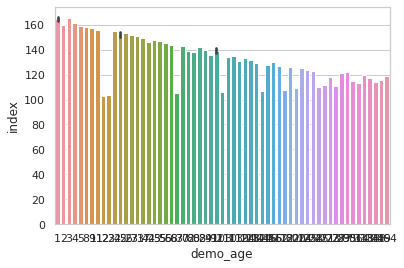

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='demo_age', y='index', data=df_age)
#need to clean up xlabels
#need to assign numbers 1-185 to years 

In [ ]:
#income = np.unique(data_multi['demo_income'], return_counts=True)

data_multi['demo_income'].value_counts()
#household income, before taxes
#10,000 or less (1)
#10,001 - 50,000 (2)
#50,001 - 100,000 (3)
#100,001 - 200,004 (4)
#more than 200,000 (5)

2.0    56668
3.0    52803
4.0    17415
1.0     6429
5.0     2138
Name: demo_income, dtype: int64

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_income'])['demo_income'].value_counts()

2.0    3321
3.0    3079
4.0    1009
1.0     375
5.0     122
Name: demo_income, dtype: int64

In [ ]:
df_income = pd.DataFrame({'income':['10k or less', '10k - 50k', '50k - 100k', '100k - 200k', '>200k'], 
                   'number of raters':[375, 3321, 3079, 1009, 122]})

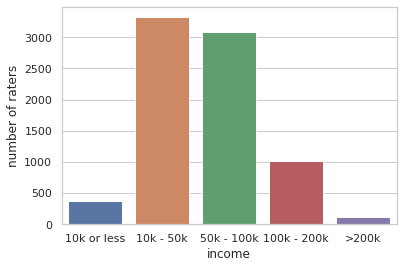

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='income', y='number of raters', data=df_income)

In [ ]:
#np.unique(data_multi['demo_religion_1'], return_counts=True)
#atheist (1)

data_multi['demo_religion_1'].value_counts()



1.0    27143
Name: demo_religion_1, dtype: int64

In [ ]:
 data_multi.drop_duplicates(['labeler_id', 'demo_religion_1'])['demo_religion_1'].value_counts()

1.0    1608
Name: demo_religion_1, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_2'], return_counts=True)
#buddhist (2)

data_multi['demo_religion_2'].value_counts()


1.0    2138
Name: demo_religion_2, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_2'])['demo_religion_2'].value_counts()

1.0    126
Name: demo_religion_2, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_11'], return_counts=True)
#christian (11)

data_multi['demo_religion_11'].value_counts()

1.0    58573
Name: demo_religion_11, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_11'])['demo_religion_11'].value_counts()

1.0    3350
Name: demo_religion_11, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_4'], return_counts=True)
#hindu (4)
data_multi['demo_religion_4'].value_counts()


1.0    660
Name: demo_religion_4, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_4'])['demo_religion_4'].value_counts()

1.0    37
Name: demo_religion_4, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_5'], return_counts=True)
#jewish (5)
data_multi['demo_religion_5'].value_counts()

1.0    2171
Name: demo_religion_5, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_5'])['demo_religion_5'].value_counts()

1.0    128
Name: demo_religion_5, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_7'], return_counts=True)
#mormon (7)
data_multi['demo_religion_7'].value_counts()


1.0    1066
Name: demo_religion_7, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_7'])['demo_religion_7'].value_counts()

1.0    60
Name: demo_religion_7, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_8'], return_counts=True)
#muslim (8)
data_multi['demo_religion_8'].value_counts()


1.0    969
Name: demo_religion_8, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_8'])['demo_religion_8'].value_counts()

1.0    56
Name: demo_religion_8, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_9'], return_counts=True)
#nothing in particular (9)
data_multi['demo_religion_9'].value_counts()


1.0    36790
Name: demo_religion_9, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_9'])['demo_religion_9'].value_counts()

1.0    2191
Name: demo_religion_9, dtype: int64

In [ ]:
np.unique(data_multi['demo_religion_10'], return_counts=True)
#other (10)
data_multi['demo_religion_10'].value_counts()

1.0    8511
Name: demo_religion_10, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_religion_10'])['demo_religion_10'].value_counts()

1.0    497
Name: demo_religion_10, dtype: int64

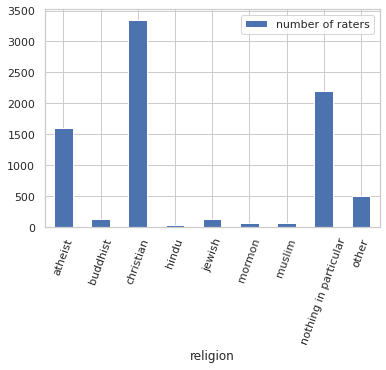

In [ ]:
df = pd.DataFrame({'religion':['atheist', 'buddhist', 'christian', 'hindu', 
                               'jewish', 'mormon', 'muslim', 'nothing in particular', 'other'], 
                   'number of raters':[1608, 126, 3350, 37, 128, 60, 56, 2191, 497]})


ax = df.plot.bar(x='religion', y='number of raters', rot=70)

In [ ]:
np.unique(data_multi['demo_sexual_orien_1'], return_counts=True)
#straight / heterosexual
data_multi['demo_sexual_orien_1'].value_counts()

1.0    115539
Name: demo_sexual_orien_1, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_1'])['demo_sexual_orien_1'].value_counts()

1.0    6727
Name: demo_sexual_orien_1, dtype: int64

In [ ]:
np.unique(data_multi['demo_sexual_orien_2'], return_counts=True)
#gay or lesbian
data_multi['demo_sexual_orien_2'].value_counts()

1.0    5333
Name: demo_sexual_orien_2, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_2'])['demo_sexual_orien_2'].value_counts()

1.0    308
Name: demo_sexual_orien_2, dtype: int64

In [ ]:
np.unique(data_multi['demo_sexual_orien_3'], return_counts=True)
#bisexual 
data_multi['demo_sexual_orien_3'].value_counts()

1.0    12171
Name: demo_sexual_orien_3, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_3'])['demo_sexual_orien_3'].value_counts()

1.0    727
Name: demo_sexual_orien_3, dtype: int64

In [ ]:
np.unique(data_multi['demo_sexual_orien_4'], return_counts=True)
#other
data_multi['demo_sexual_orien_4'].value_counts()

1.0    2083
Name: demo_sexual_orien_4, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_4'])['demo_sexual_orien_4'].value_counts()

1.0    124
Name: demo_sexual_orien_4, dtype: int64

In [ ]:
np.unique(data_multi['demo_sexual_orien_5'], return_counts=True)
#prefer not to say
data_multi['demo_sexual_orien_5'].value_counts()

1.0    1054
Name: demo_sexual_orien_5, dtype: int64

In [ ]:
data_multi.drop_duplicates(['labeler_id', 'demo_sexual_orien_5'])['demo_sexual_orien_5'].value_counts()

1.0    63
Name: demo_sexual_orien_5, dtype: int64

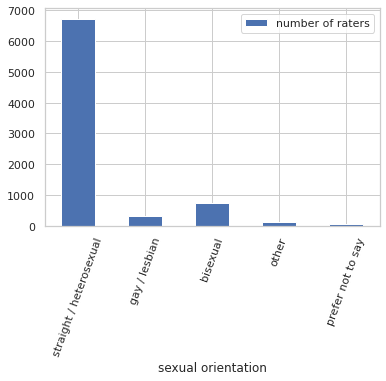

In [ ]:
df = pd.DataFrame({'sexual orientation':['straight / heterosexual', 'gay / lesbian', 'bisexual', 
                                       'other', 'prefer not to say'], 
                   'number of raters':[6727, 308, 727, 124, 63]})


ax = df.plot.bar(x='sexual orientation', y='number of raters', rot=70)
#lightning bar 

In [ ]:
data_sexual_orientation = [['straight', 6727] , ['gay / lesbian', 308], ['bisexual', 727], ['other', 124], ['prefer not to say', 63]]
sexual_orientation = pd.DataFrame(data_sexual_orientation, columns = ['Sexual Orientation', 'Number of Raters']) 

In [ ]:
sexual_orientation

,Sexual Orientation,Number of Raters
0,straight,6727
1,gay / lesbian,308
2,bisexual,727
3,other,124
4,prefer not to say,63


In [ ]:
np.unique(data_multi['demo_ideology'], return_counts=True)

data_multi['demo_ideology'].value_counts()
#extremely liberal (1)
#liberal (2)
#slightly liberal (3)
#neither libreral nor conservative (4)
#slightly conservative (5)
#conservative (6)
#extremely conservative (7)
#haven't thought much about it (8)

#i think nans across all these questions are just ppl who skipped thesee 

2.0    33812
4.0    23112
3.0    21333
1.0    17944
6.0    15628
5.0    15101
7.0     4544
8.0     4055
Name: demo_ideology, dtype: int64

In [ ]:
#turn this into a dataframe
data_multi.drop_duplicates(['labeler_id', 'demo_ideology'])['demo_ideology'].value_counts()

2.0    1968
4.0    1367
3.0    1242
1.0    1065
6.0     895
5.0     860
7.0     264
8.0     249
Name: demo_ideology, dtype: int64

In [ ]:
data_ideology = [['extremely liberal', 1065] , ['liberal', 1968], ['slightly liberal', 1242], ['neither liberal nor conservative', 1367], ['slightly conservative', 860], ['conservative', 895], ['extremely conservative', 264], ['idk', 249]]
demo_ideology = pd.DataFrame(data_ideology, columns = ['Political Ideology', 'Number of Raters']) 

In [ ]:
demo_ideology

,Political Ideology,Number of Raters
0,extremely liberal,1065
1,liberal,1968
2,slightly liberal,1242
3,neither liberal nor conservative,1367
4,slightly conservative,860
5,conservative,895
6,extremely conservative,264
7,idk,249


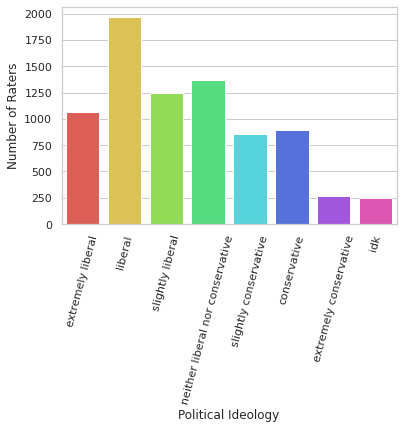

In [ ]:
sns.set(style='whitegrid')
ax = sns.barplot(x='Political Ideology', y = 'Number of Raters', 
            data=demo_ideology, palette ='hls', saturation = 8)

for name in ax.get_xticklabels(): #notsure what the get_xticklabels does, is it like getcolumnames 
  name.set_rotation(75) 



#barplot returns a matplotlib.axes object so you have to do this way
#FacetGrid object is different --> rotate label text in seaborn factorplot

# **SECTION 4: DISTRIBUTION OF RATERS BASED ON DEMOGRAPHIC GROUP TO TARGETED GROUP IN POSTS**

In [ ]:
display(data_multi, data)
pd.options.display.max_rows

,sentiment,respect,insult,humiliate,status,dehumanize,violence_phys,genocide,attack_defend,hatespeech,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,weight,has_targets,target_identity_count,labeler_id,rater_measure,rater_infitms,rater_outfitms,infitms,outfitms,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,...,target_political_9,target_political_10,target_political_11,target_political_11_text,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology,locationlatitude,locationlongitude,identity,hypothesis
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.200000,1,1.0,10873,0.36,1.35,1.23,0.81,1.88,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.55029296875,-77.39420318603515625,0.917681,-1.130178
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39773,twitter,1159364387838341120,The trans women reading this tweet right now i...,-6.52,1.00,3,0.333333,1,1.0,2790,-0.35,0.57,0.42,0.96,0.43,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,115.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,32.9568939208984375,-96.83170318603515625,0.918119,-1.146973
2,4.0,4.0,3.0,2.0,1.0,1.0,0.0,0.0,3.0,1.0,47101,youtube,UgytWyMwDquehpAEspl4AaABAg,Question: These 4 broads who criticize America...,0.36,0.31,4,0.250000,1,1.0,3379,-0.48,1.16,0.67,0.90,0.74,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,126.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0,39.3361053466796875,-76.53890228271484375,0.985910,-0.207369
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,43625,youtube,Ugxgvb5k_yZm2w5V-v94AaABAg,It is about time for all illegals to go back t...,0.26,0.29,4,0.250000,1,1.0,7365,0.86,1.18,0.87,0.81,0.68,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,2.0,,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,127.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,37.1439971923828125,-94.4727020263671875,0.969761,-0.055536
4,4.0,4.0,3.0,2.0,1.0,1.0,1.0,0.0,2.0,1.0,12538,reddit,euol97y,For starters bend over the one in pink and kic...,1.54,0.51,2,0.500000,1,1.0,488,-0.54,0.95,1.00,0.76,0.63,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,,1.0,,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,112.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0,34.215301513671875,-79.64679718017578125,0.935462,0.104225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,37080,twitter,1158039801448161280,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,-4.88,0.69,1,1.000000,1,1.0,8590,-1.07,0.98,0.57,0.16,0.11,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

,comment_id,platform,uid,predict_text,measure,std_err,num_ratings,infitms,outfitms,identity,hypothesis,target_identities_1,target_identities_2,target_identities_3,target_identities_4,target_identities_5,target_identities_6,target_identities_7,target_identities_9,target_race_1,target_race_2,target_race_3,target_race_8,target_race_4,target_race_5,target_race_6,target_race_7,target_race_7_text,target_religion_1,target_religion_2,target_religion_4,target_religion_5,target_religion_8,target_religion_9,target_religion_10,target_religion_6,target_religion_6_text,target_citizen_5,target_citizen_1,target_citizen_2,...,target_disability_2,target_disability_3,target_disability_4,target_disability_5,target_disability_9,target_disability_6,target_disability_6_text,target_identity_count,demo_gender,demo_gender_4_text,demo_trans,demo_educ,demo_race_ethnicitie_1,demo_race_ethnicitie_2,demo_race_ethnicitie_3,demo_race_ethnicitie_4,demo_race_ethnicitie_5,demo_race_ethnicitie_8,demo_race_ethnicitie_6,demo_race_ethnicitie_7,demo_race_ethnicitie_7_text,demo_age,demo_income,demo_religion_1,demo_religion_2,demo_religion_11,demo_religion_4,demo_religion_5,demo_religion_7,demo_religion_8,demo_religion_9,demo_religion_10,demo_religion_10_text,demo_sexual_orien_1,demo_sexual_orien_2,demo_sexual_orien_3,demo_sexual_orien_4,demo_sexual_orien_5,demo_sexual_orien_4_text,demo_ideology
0,21556,twitter,1134110084978675712,Damn [SLUR] bitch get a hobby kind of fuck shi...,0.05,0.60,6,0.52,0.58,0.868539,0.192592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,116.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,1.0
1,19190,reddit,ew8eh8e,Fuck off back to your Chapo shithole,0.23,0.62,4,0.45,0.44,0.880614,0.367588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,1.0,,2.0,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,,125.0,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,5.0
2,3177,reddit,eppgjvg,"No, it means you're developing a black man dic...",0.37,0.42,4,1.40,1.10,0.857048,-0.536590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,2.0,,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,113.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,2.0
3,47777,youtube,Ugz2iZCY9nfSWtCyWE14AaABAg,Yes indeed. She sort of reminds me of the elde...,-3.90,0.34,5,0.81,1.88,0.917681,-1.130178,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,110.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,NaN,NaN,NaN,NaN,,4.0
4,173,reddit,enysnba,"I would love to use a double dildo with a bud,...",-2.98,0.37,5,2.35,1.09,0.919640,0.284625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,2.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,117.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,1.0,NaN,NaN,NaN,NaN,,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41013,22986,twitter,1134939160471580672,Millions of #Yemen-is participated in mass ral...,-4.40,0.35,4,1.30,0.43,0.934007,-0.974684,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,,1.0,1.0,,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,,142.0,4.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,1.0,NaN,NaN,NaN,,4.0
41014,14

60

In [ ]:


#this has degree of hate speech, target identity in post, and rater demographic background 
df3 = pd.merge(data_multi, data_identity)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
pd.set_option('display.max_rows', 500)
df3